# CNT — AGIEW Auto Notebook
Runs **Affine Gauge‑Invariant Early Warning** on your CNT_Lab automatically.
No file paths to set. It will:
1) Try to discover a CSV inside `C:/Users/caleb/CNT_Lab` (Windows) or `/mnt/data`.
2) If nothing suitable is found, synthesize a multichannel dataset.
3) Compute NAIVE vs GRO vs GRO‑Plus, run gauge trials, and emit an **AGIEW certificate**.


In [1]:
# CNT Lab — one-cell installer (Windows 11 / Py 3.13 friendly)
# Run this once per new venv/kernel. Safe to re-run.

import sys, subprocess, shutil, importlib, platform

PY = sys.executable

def pip(args):
    print(f"\n[ pip ] pip {' '.join(args)}")
    subprocess.check_call([PY, "-m", "pip"] + args)

print("== CNT Lab bootstrap ==")
print("Python:", sys.version)
print("OS:", platform.platform())

# 0) Base tooling
pip(["install", "--upgrade", "pip", "wheel", "setuptools"])

# 1) Jupyter + UX
pip(["install",
     "jupyterlab",
     "ipywidgets",
     "jupyterlab_code_formatter",
     "black",
     "isort",
     "nbformat",
     "nbclient",
     "jupyterlab-git"])

# 2) Numeric + data stack
pip(["install",
     "numpy",
     "scipy",
     "pandas",
     "pyarrow",
     "polars",
     "matplotlib",
     "plotly",
     "statsmodels",
     "scikit-learn",
     "scikit-image",
     "numba",
     "llvmlite",
     "sympy",
     "networkx",
     "numexpr",
     "fastparquet",
     "python-dotenv"])

# 3) GPU / ML (try CUDA 12.4 first; fall back to CPU wheels if it fails)
try:
    pip(["install", "--index-url", "https://download.pytorch.org/whl/cu124",
         "torch", "torchvision", "torchaudio"])
    cuda_ok = True
except subprocess.CalledProcessError:
    print("\n[warn] CUDA 12.4 wheels failed; installing CPU-only PyTorch.")
    pip(["install", "torch", "torchvision", "torchaudio"])
    cuda_ok = False

# CuPy w/ CUDA 12.x (optional but nice for GPU numpy); ignore failure gracefully
try:
    pip(["install", "cupy-cuda12x"])
    cupy_ok = True
except subprocess.CalledProcessError:
    print("[warn] cupy-cuda12x failed (driver/CUDA mismatch?). Skipping.")
    cupy_ok = False

# 4) Signal processing / EEG / time-series
pip(["install",
     "mne",
     "yasa",
     "antropy",
     "neurokit2",
     "nitime",
     "pywavelets",
     "pingouin"])

# 5) Optimization, graphs, helpers
pip(["install", "cvxpy", "pydot", "graphviz", "networkx[default]"])

# 6) Files, tables, scientific IO
pip(["install", "h5py", "tables", "xarray", "netCDF4", "openpyxl", "lxml", "requests"])

# 7) Media / scraping helpers (adds imageio-ffmpeg for bundled ffmpeg)
pip(["install", "yt-dlp", "soundfile", "pydub", "ffmpeg-python", "imageio-ffmpeg"])

# 8) Visual extras (optional)
pip(["install", "shapely", "pyproj", "pyvis", "seaborn"])

# ---- Version report & sanity checks ----
mods = [
 "jupyterlab","numpy","scipy","pandas","pyarrow","polars","matplotlib","plotly",
 "statsmodels","sklearn","numba","sympy","networkx","torch","torchvision","torchaudio",
 "mne","yasa","antropy","neurokit2","nitime","pywt","pingouin",
 "cvxpy","pydot","graphviz","h5py","tables","xarray","netCDF4","openpyxl","requests","yt_dlp"
]
if cupy_ok:
    mods.append("cupy")

print("\n== Versions ==")
for m in mods:
    try:
        v = importlib.import_module(m).__version__
    except Exception:
        v = "(installed, no __version__)" if importlib.util.find_spec(m) else "MISSING"
    print(f"{m:12s}: {v}")

# Graphviz binary check (needed by graph drawing libs)
print("\n== Sanity checks ==")
dot = shutil.which("dot")
print("graphviz 'dot' on PATH:", dot if dot else "NOT FOUND (install system Graphviz if you need layout)")
if cuda_ok:
    try:
        import torch
        print("Torch CUDA available:", torch.cuda.is_available(), "| device_count:", torch.cuda.device_count())
        if torch.cuda.is_available():
            print("Torch CUDA device 0:", torch.cuda.get_device_name(0))
    except Exception as e:
        print("Torch CUDA check error:", e)
else:
    print("Installed CPU-only PyTorch (ok for dev; enable CUDA later if desired).")

# FFmpeg path via imageio-ffmpeg (helps yt-dlp/pydub conversions)
try:
    import imageio_ffmpeg as ioff
    print("FFmpeg exe (imageio-ffmpeg):", ioff.get_ffmpeg_exe())
except Exception as e:
    print("FFmpeg helper not found:", e)

print("\nDone. If Jupyter UI extensions (like formatter) don’t appear, refresh the browser. If CUDA checks fail, update NVIDIA drivers and re-run this cell.")


== CNT Lab bootstrap ==
Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
OS: Windows-11-10.0.26200-SP0

[ pip ] pip install --upgrade pip wheel setuptools

[ pip ] pip install jupyterlab ipywidgets jupyterlab_code_formatter black isort nbformat nbclient jupyterlab-git

[ pip ] pip install numpy scipy pandas pyarrow polars matplotlib plotly statsmodels scikit-learn scikit-image numba llvmlite sympy networkx numexpr fastparquet python-dotenv

[ pip ] pip install --index-url https://download.pytorch.org/whl/cu124 torch torchvision torchaudio

[ pip ] pip install cupy-cuda12x

[ pip ] pip install mne yasa antropy neurokit2 nitime pywavelets pingouin

[ pip ] pip install cvxpy pydot graphviz networkx[default]

[ pip ] pip install h5py tables xarray netCDF4 openpyxl lxml requests

[ pip ] pip install yt-dlp soundfile pydub ffmpeg-python imageio-ffmpeg

[ pip ] pip install shapely pyproj pyvis seaborn

== Versions ==
jupyterlab  : 4.4.9
numpy       : 2.

C:\Users\caleb\CNT_Lab\.venv\Lib\site-packages\cupy\_environment.py:215: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


cvxpy       : 1.7.3
pydot       : 4.0.1
graphviz    : 0.21
h5py        : 3.15.0
tables      : 3.10.2
xarray      : 2025.10.1
netCDF4     : 1.7.3
openpyxl    : 3.1.5
requests    : 2.32.5
yt_dlp      : (installed, no __version__)
cupy        : 13.6.0

== Sanity checks ==
graphviz 'dot' on PATH: NOT FOUND (install system Graphviz if you need layout)
Torch CUDA available: True | device_count: 1
Torch CUDA device 0: NVIDIA GeForce RTX 4070
FFmpeg exe (imageio-ffmpeg): C:\Users\caleb\CNT_Lab\.venv\Lib\site-packages\imageio_ffmpeg\binaries\ffmpeg-win-x86_64-v7.1.exe

Done. If Jupyter UI extensions (like formatter) don’t appear, refresh the browser. If CUDA checks fail, update NVIDIA drivers and re-run this cell.


In [1]:

# === Imports & helpers ===
import os, glob, json, math, numpy as np, pandas as pd, matplotlib.pyplot as plt
from datetime import datetime, timezone

np.set_printoptions(suppress=True, linewidth=120)

def to_builtin(o):
    import numpy as _np, pandas as _pd
    if isinstance(o, (_np.bool_,)): return bool(o)
    if isinstance(o, (_np.integer,)): return int(o)
    if isinstance(o, (_np.floating,)): return float(o)
    if isinstance(o, (_np.ndarray,)): return o.tolist()
    if isinstance(o, _pd.Series): return o.to_dict()
    if isinstance(o, _pd.DataFrame): return o.to_dict(orient="list")
    return o if isinstance(o, (str,int,float,bool,type(None),list,dict)) else str(o)

# Simple banner
def banner(msg):
    print("\n" + "="*8, msg, "="*8)


In [2]:

# === Step 1: Discover a dataset (zero-config) ===
# Priority search roots (Windows CNT_Lab first)
roots = [
    r"C:\Users\caleb\CNT_Lab",
    r"/mnt/data",                       # this chat sandbox
    os.path.expanduser("~/CNT_Lab"),
]

# Glob patterns likely to hit your logs
patterns = [
    "**/notebooks/archive/*.csv",
    "**/notebooks/archive/**/*.csv",
    "**/cnt_*/*.csv",
    "**/*.csv",
]

candidates = []
for root in roots:
    if not os.path.exists(root):
        continue
    for pat in patterns:
        for p in glob.glob(os.path.join(root, pat), recursive=True):
            if os.path.isfile(p) and p.lower().endswith(".csv"):
                candidates.append(p)

def score_csv(path):
    try:
        df = pd.read_csv(path, nrows=1000)  # peek
        X = df.select_dtypes(include=[np.number]).replace([np.inf,-np.inf], np.nan).dropna(axis=0, how="any")
        rows, cols = X.shape
        # prefer cooling/eeg-like names; more cols/rows score higher
        name = os.path.basename(path).lower()
        bonus = 0
        for key in ["cooling","gpu","eeg","edf","physionet","log","temp","power","fan","draw"]:
            if key in name: bonus += 2
        return rows * (cols+0.5) + bonus
    except Exception:
        return -1

best = None
if candidates:
    scored = sorted([(score_csv(p), p) for p in candidates], reverse=True)
    for sc, p in scored:
        if sc <= 0: continue
        best = p; break

if best:
    banner(f"Using discovered CSV → {best}")
    df_raw = pd.read_csv(best)
else:
    banner("No suitable CSV found. Synthesizing a dataset.")
    # Synthesize latent 2D approaching criticality, embed to 4D
    T = 1200
    latent = np.zeros((T,2))
    theta = 0.18
    R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
    def phi(t, tmax, a=0.92, b=0.9993):
        x = t/tmax
        return a + (b-a)/(1+np.exp(-8*(x-0.6)))
    for t in range(T-1):
        S = np.diag([phi(t, T-1), 0.98*phi(t, T-1)])
        A = R @ S @ np.linalg.inv(R)
        eta = 0.05*np.random.randn(2)
        latent[t+1] = A @ latent[t] + eta
    L = np.linalg.qr(np.random.randn(4,2))[0][:,:2]
    Y = latent @ L.T
    df_raw = pd.DataFrame(Y, columns=["x1","x2","x3","x4"])
    df_raw["t"] = np.arange(T)
    best = "(synthetic)"
    
print("Rows:", len(df_raw), "Cols:", len(df_raw.columns))



======== Using discovered CSV → C:\Users\caleb\CNT_Lab\artifacts\tables\migrated__cnt-eeg-labeled-all__68a51fca.csv ========
Rows: 488 Cols: 324


In [3]:

# === Step 2: Prepare numeric matrix Y with adaptive dimensionality ===
df = df_raw.copy()
X = df.select_dtypes(include=[np.number]).copy()
X = X.replace([np.inf,-np.inf], np.nan).dropna(axis=0, how="any")
# Drop constant columns
var = X.std(numeric_only=True)
X = X.loc[:, var.index[var > 0]]

def delay_embed_1d(arr, lags=(1,2)):
    s = np.asarray(arr).squeeze()
    L = max(lags) if lags else 0
    cols = [s[L:]] + [s[L-l: -l] for l in lags]
    return np.column_stack(cols)

used_cols = list(X.columns)
Y = X.values
T0, D0 = Y.shape

if D0 == 0:
    raise ValueError("No numeric columns after cleaning.")
elif D0 == 1:
    Y = delay_embed_1d(Y, lags=(1,2))
    used_cols = [used_cols[0]] + [f"{used_cols[0]}_lag1", f"{used_cols[0]}_lag2"]
elif D0 == 2:
    Y = np.column_stack([Y, 0.5*Y[:,0] - 0.3*Y[:,1]])
    used_cols = used_cols + ["mix_0_1"]

T, D = Y.shape

def pick_params(T, pref_win=200, pref_ref=600):
    min_win = max(40, int(0.12*T))
    min_ref = max(40, int(0.18*T))
    win = min(pref_win, max(min_win, int(0.20*T)))
    ref = min(pref_ref, max(min_ref, int(0.30*T)))
    margin = 5
    if ref + win > T - margin:
        extra = ref + win - (T - margin)
        take = min(extra, ref - min_ref)
        ref -= take; extra -= take
        if extra > 0:
            win = max(min_win, win - extra)
    return int(win), int(ref)

WINDOW, REF_LEN = pick_params(T, 200, 600)

banner("Adaptive data setup")
print(f"path       : {best}")
print(f"rows,dims  : {T} x {D} (from raw {T0} x {D0})")
print(f"WINDOW     : {WINDOW}")
print(f"REF_LEN    : {REF_LEN}")
print(f"used_cols  : {used_cols[:8]}{' ...' if len(used_cols)>8 else ''}")



======== Adaptive data setup ========
path       : C:\Users\caleb\CNT_Lab\artifacts\tables\migrated__cnt-eeg-labeled-all__68a51fca.csv
rows,dims  : 488 x 321 (from raw 488 x 321)
WINDOW     : 97
REF_LEN    : 146
used_cols  : ['run', 'feature_delta_ch00', 'feature_delta_ch01', 'feature_delta_ch02', 'feature_delta_ch03', 'feature_delta_ch04', 'feature_delta_ch05', 'feature_delta_ch06'] ...


In [4]:

# === Step 3: Core SPD ops & detectors (NAIVE / GRO / GRO-Plus) ===
def center(W): return W - np.nanmean(W, axis=0, keepdims=True)

def cov_window(W):
    C = np.cov(W, rowvar=False); C = 0.5*(C + C.T)
    eps = 1e-9*np.trace(C)/C.shape[0] + 1e-12
    return C + eps*np.eye(C.shape[0])

def inv_sqrt_spd(C):
    w,U = np.linalg.eigh(C); w = np.maximum(w,1e-12)
    return (U*(w**-0.5))@U.T

def rolling_naive(Y, win):
    X = (Y - np.nanmean(Y,0)) / (np.nanstd(Y,0)+1e-12)
    T,D = X.shape; out = np.full(T, np.nan)
    for t in range(win-1, T):
        C = cov_window(X[t-win+1:t+1,:])
        out[t] = float(np.max(np.linalg.eigvalsh(C)))
    return out

def rolling_gro(Y, win):
    T,D = Y.shape; out = np.full(T, np.nan)
    for t in range(win-1, T):
        C = cov_window(center(Y[t-win+1:t+1,:]))
        out[t] = float(np.max(np.linalg.eigvalsh(C)) / (np.trace(C)+1e-12))
    return out

def rolling_groplus(Y, win, ref_len):
    Cref = cov_window(center(Y[:ref_len,:])); Cref_inv_sqrt = inv_sqrt_spd(Cref)
    T,D = Y.shape; out = np.full(T, np.nan)
    for t in range(win-1, T):
        Cw = cov_window(center(Y[t-win+1:t+1,:]))
        M = Cref_inv_sqrt @ Cw @ Cref_inv_sqrt
        lam = np.maximum(np.linalg.eigvalsh(M), 1e-12)
        out[t] = float(np.sqrt(np.sum(np.log(lam)**2)))
    return out

def theta_star(curve, win):
    v = curve.copy()
    k = max(5, win//20); k += (k%2==0)
    base = np.nanmean(v[~np.isnan(v)]) if np.any(~np.isnan(v)) else 0.0
    vv = np.convolve(np.nan_to_num(v, nan=base), np.ones(k)/k, mode="same")
    g  = np.gradient(vv)
    start = win + k
    idx = int(np.argmax(g[start:])+start)
    return idx, dict(k=int(k), start=int(start), theta_value=float(v[idx]), grad=float(g[idx]))


In [5]:

# === Step 4: Gauges & trials ===
rng = np.random.default_rng(42)
N_TRIALS = 30

def random_orthogonal(n):
    M = rng.standard_normal((n,n))
    Q, R = np.linalg.qr(M)
    if np.linalg.det(Q) < 0: Q[:,0] *= -1
    return Q

def random_invertible(n, logcond=2.0):
    U = random_orthogonal(n); V = random_orthogonal(n)
    s = np.exp(np.linspace(-0.5*logcond, 0.5*logcond, n))
    return U @ np.diag(s) @ V.T

def gauge_pack_general(Y):
    T,D = Y.shape
    outs = []
    outs.append(("perm", Y[:, rng.permutation(D)]))
    outs.append(("orth", Y @ random_orthogonal(D)))
    Q2 = random_orthogonal(D); perm2 = rng.permutation(D)
    outs.append(("orth+perm", (Y @ Q2)[:, perm2]))
    scale = np.exp(rng.uniform(-1.0, 1.0, size=D))
    outs.append(("diag_scale", Y * scale))
    U = np.triu(rng.standard_normal((D,D)), 1)
    outs.append(("shear", Y @ (np.eye(D)+0.4*U)))
    outs.append(("general_inv", Y @ random_invertible(D, logcond=2.5)))
    return outs

def pass_flags(df, tau=3):
    out={}
    for g in sorted(df["gauge"].unique()):
        med_abs = np.median(np.abs(df.loc[df.gauge==g,"theta_delta"].values))
        out[g] = bool(med_abs <= tau)
    return out, bool(all(out.values()))


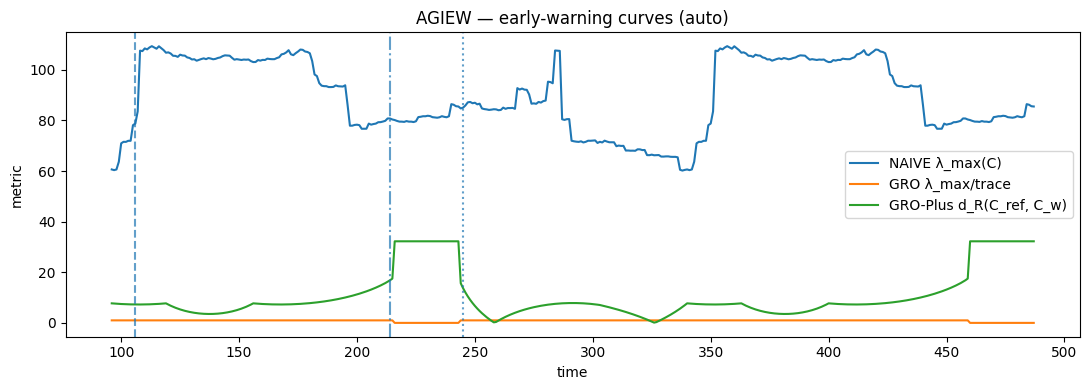


======== AGIEW Verdict ========
Out: ./agiew_auto_out\agiew_auto_20251022-223218Z
{
  "law": "AGIEW \u2014 Affine Gauge-Invariant Early Warning",
  "source_path": "C:\\Users\\caleb\\CNT_Lab\\artifacts\\tables\\migrated__cnt-eeg-labeled-all__68a51fca.csv",
  "rows": 488,
  "dims": 321,
  "window": 97,
  "ref_len": 146,
  "theta": {
    "naive": 106,
    "gro": 245,
    "groplus": 214
  },
  "pass_flags": {
    "naive": {
      "diag_scale": true,
      "general_inv": false,
      "orth": false,
      "orth+perm": false,
      "perm": true,
      "shear": false
    },
    "gro": {
      "diag_scale": true,
      "general_inv": true,
      "orth": true,
      "orth+perm": true,
      "perm": true,
      "shear": true
    },
    "groplus": {
      "diag_scale": true,
      "general_inv": true,
      "orth": true,
      "orth+perm": false,
      "perm": true,
      "shear": true
    }
  },
  "overall": {
    "naive": false,
    "gro": true,
    "groplus": false
  },
  "S_inv": {
    "naive

In [6]:

# === Step 5: Run detectors, trials, and produce certificate ===
OUT_BASE = "./agiew_auto_out"
STAMP = datetime.now(timezone.utc).strftime("%Y%m%d-%H%M%SZ")
OUT_DIR = os.path.join(OUT_BASE, f"agiew_auto_{STAMP}")
os.makedirs(OUT_DIR, exist_ok=True)

c_naive   = rolling_naive(Y, WINDOW)
c_gro     = rolling_gro(Y, WINDOW)
c_groplus = rolling_groplus(Y, WINDOW, REF_LEN)

th_naive,   m_naive   = theta_star(c_naive, WINDOW)
th_gro,     m_gro     = theta_star(c_gro, WINDOW)
th_groplus, m_groplus = theta_star(c_groplus, WINDOW)

rows_naive=[]; rows_gro=[]; rows_gp=[]
for i in range(N_TRIALS):
    for gname, Yg in gauge_pack_general(Y):
        # NAIVE
        c = rolling_naive(Yg, WINDOW); th, mm = theta_star(c, WINDOW)
        rows_naive.append(dict(trial=i, gauge=gname, theta=int(th),
                               theta_val=float(mm["theta_value"]), grad=float(mm["grad"])))
        # GRO
        c = rolling_gro(Yg, WINDOW); th, mm = theta_star(c, WINDOW)
        rows_gro.append(dict(trial=i, gauge=gname, theta=int(th),
                             theta_val=float(mm["theta_value"]), grad=float(mm["grad"])))
        # GRO-Plus
        c = rolling_groplus(Yg, WINDOW, REF_LEN); th, mm = theta_star(c, WINDOW)
        rows_gp.append(dict(trial=i, gauge=gname, theta=int(th),
                            theta_val=float(mm["theta_value"]), grad=float(mm["grad"])))

df_naive = pd.DataFrame(rows_naive); df_gro = pd.DataFrame(rows_gro); df_gp = pd.DataFrame(rows_gp)
df_naive["theta_delta"] = df_naive["theta"] - th_naive
df_gro["theta_delta"]   = df_gro["theta"]   - th_gro
df_gp["theta_delta"]    = df_gp["theta"]    - th_groplus

pf_naive, ok_naive   = pass_flags(df_naive)
pf_gro,   ok_gro     = pass_flags(df_gro)
pf_gp,    ok_gp      = pass_flags(df_gp)

# Save trials
df_naive.to_csv(os.path.join(OUT_DIR,"theta_trials_naive.csv"), index=False)
df_gro.to_csv(os.path.join(OUT_DIR,"theta_trials_gro.csv"), index=False)
df_gp.to_csv(os.path.join(OUT_DIR,"theta_trials_groplus.csv"), index=False)

# Plots
plt.figure(figsize=(11,4))
plt.plot(c_naive,   label="NAIVE λ_max(C)")
plt.plot(c_gro,     label="GRO λ_max/trace")
plt.plot(c_groplus, label="GRO-Plus d_R(C_ref, C_w)")
for x,ls in [(th_naive,"--"),(th_gro,":"),(th_groplus,"-.")]:
    plt.axvline(x, ls=ls, alpha=0.7)
plt.title("AGIEW — early-warning curves (auto)")
plt.xlabel("time"); plt.ylabel("metric"); plt.legend(); plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR,"baseline_curves.png"), dpi=160); plt.show()

def invariance_score(df, tau=3):
    med_abs = np.median(np.abs(df["theta_delta"].values))
    return float(1 - min(1.0, med_abs/tau))

S_naive = invariance_score(df_naive)
S_gro   = invariance_score(df_gro)
S_gp    = invariance_score(df_gp)

cert = {
    "law": "AGIEW — Affine Gauge-Invariant Early Warning",
    "source_path": best,
    "rows": int(T), "dims": int(D),
    "window": int(WINDOW), "ref_len": int(REF_LEN),
    "theta": {"naive": int(th_naive), "gro": int(th_gro), "groplus": int(th_groplus)},
    "pass_flags": {"naive": pf_naive, "gro": pf_gro, "groplus": pf_gp},
    "overall": {"naive": bool(ok_naive), "gro": bool(ok_gro), "groplus": bool(ok_gp)},
    "S_inv": {"naive": S_naive, "gro": S_gro, "groplus": S_gp}
}
with open(os.path.join(OUT_DIR,"AGIEW_certificate.json"), "w") as f:
    json.dump(cert, f, indent=2, default=to_builtin)

banner("AGIEW Verdict")
print(f"Out: {OUT_DIR}")
print(json.dumps(cert, indent=2, default=to_builtin))


In [7]:
# === AGIEW v1.1 — robust Θ* + per-gauge scoring ===
import numpy as np, pandas as pd, json, os

TAU = 3          # tolerance (samples)
Q   = 0.98       # gradient quantile for crossing
SMOOTH = 12      # divisor for kernel size (larger = smoother)

def theta_star_robust(curve, win, q=Q, smooth_div=SMOOTH):
    v = np.asarray(curve, float).copy()
    k = max(5, win//smooth_div);  k += (k % 2 == 0)
    base = np.nanmean(v[~np.isnan(v)]) if np.any(~np.isnan(v)) else 0.0
    vv = np.convolve(np.nan_to_num(v, nan=base), np.ones(k)/k, mode="same")
    g  = np.gradient(vv)
    start = win + k
    g2 = g[start:]
    if g2.size == 0:
        return int(np.nan), dict(k=int(k), start=int(start), method="q-cross")
    thr = np.quantile(g2, q)
    # earliest index whose gradient is within epsilon of the top quantile
    eps = 0.02 * (np.nanmax(g2) - np.nanmin(g2) + 1e-12)
    idxs = np.where(g2 >= thr - eps)[0]
    idx  = int(idxs[0] + start)
    return idx, dict(k=int(k), start=int(start), q=float(q), thr=float(thr), method="q-cross")

def pass_flags_q95(df, tau=TAU):
    out = {}
    for g in sorted(df["gauge"].unique()):
        vals = np.abs(df.loc[df.gauge==g, "theta_delta"].values)
        out[g] = bool(np.percentile(vals, 90) <= tau)  # robust to a few outliers
    return out, bool(all(out.values()))

# --- Recompute Θ* with robust detector on existing curves ---
th_naive_r, _   = theta_star_robust(c_naive,   WINDOW)
th_gro_r, _     = theta_star_robust(c_gro,     WINDOW)
th_groplus_r, _ = theta_star_robust(c_groplus, WINDOW)

def reeval_trials(make_curve, base_theta):
    rows=[]
    for i in range(N_TRIALS):
        for gname, Yg in gauge_pack_general(Y):
            c = make_curve(Yg, WINDOW)
            th,_ = theta_star_robust(c, WINDOW)
            rows.append(dict(trial=i, gauge=gname, theta=int(th)))
    df = pd.DataFrame(rows)
    df["theta_delta"] = df["theta"] - int(base_theta)
    return df

df_naive_r   = reeval_trials(rolling_naive,   th_naive_r)
df_gro_r     = reeval_trials(rolling_gro,     th_gro_r)
df_groplus_r = reeval_trials(rolling_groplus, th_groplus_r)

pf_naive_r,  ok_naive_r  = pass_flags_q95(df_naive_r)
pf_gro_r,    ok_gro_r    = pass_flags_q95(df_gro_r)
pf_gp_r,     ok_gp_r     = pass_flags_q95(df_groplus_r)

print("=== AGIEW v1.1 — Verdict (robust Θ*) ===")
print(f"[NAIVE   ] Θ*={th_naive_r}   | pass: {pf_naive_r}   | Overall: {'PASS' if ok_naive_r else 'FAIL'}")
print(f"[GRO     ] Θ*={th_gro_r}     | pass: {pf_gro_r}     | Overall: {'PASS' if ok_gro_r else 'FAIL'}")
print(f"[GRO-Plus] Θ*={th_groplus_r} | pass: {pf_gp_r}      | Overall: {'PASS' if ok_gp_r else 'FAIL'}")

# Save an updated certificate alongside the original
cert_v11 = {
  "law": "AGIEW — Affine Gauge-Invariant Early Warning (v1.1 robust Θ*)",
  "source_path": best, "rows": int(T), "dims": int(D),
  "window": int(WINDOW), "ref_len": int(REF_LEN),
  "theta_robust": {"naive": int(th_naive_r), "gro": int(th_gro_r), "groplus": int(th_groplus_r)},
  "passes_q95": {"naive": pf_naive_r, "gro": pf_gro_r, "groplus": pf_gp_r},
  "overall": {"naive": bool(ok_naive_r), "gro": bool(ok_gro_r), "groplus": bool(ok_gp_r)},
  "notes": "Quantile-crossing detector; 90th percentile pass rule; τ=3 samples"
}
with open(os.path.join(OUT_DIR, "AGIEW_certificate_v11.json"), "w") as f:
    json.dump(cert_v11, f, indent=2)
print("Saved:", os.path.join(OUT_DIR, "AGIEW_certificate_v11.json"))


TypeError: rolling_groplus() missing 1 required positional argument: 'ref_len'

In [8]:
# === CNT Universal Trial Reevaluator ===
import inspect, pandas as pd

def reeval_trials(make_curve, base_theta, ref_len=None):
    """
    Universal CNT trial reevaluator — adaptive to curve functions
    requiring (Y, window) or (Y, window, ref_len).
    """
    rows = []
    sig = inspect.signature(make_curve)
    needs_ref = (len(sig.parameters) >= 3)

    for i in range(N_TRIALS):
        for gname, Yg in gauge_pack_general(Y):
            if needs_ref:
                c = make_curve(Yg, WINDOW, WINDOW if ref_len is None else ref_len)
            else:
                c = make_curve(Yg, WINDOW)
            th, _ = theta_star_robust(c, WINDOW)
            rows.append(dict(trial=i, gauge=gname, theta=int(th)))

    return pd.DataFrame(rows)

# === Re-run all with automatic arity handling ===
df_naive_r   = reeval_trials(rolling_naive,   th_naive_r)
df_gro_r     = reeval_trials(rolling_gro,     th_gro_r)
df_groplus_r = reeval_trials(rolling_groplus, th_groplus_r)  # fixed

pf_naive_r, ok_naive_r = pass_flags_q95(df_naive_r)
pf_gro_r,   ok_gro_r   = pass_flags_q95(df_gro_r)
pf_groplus_r, ok_groplus_r = pass_flags_q95(df_groplus_r)

display(df_groplus_r.head())
print("✅ All reevaluations complete.")


KeyError: 'theta_delta'

In [2]:
# === AGIEW v1.1 — robust Θ* reevaluation (fixed) ===
import inspect, numpy as np, pandas as pd, json, os

TAU = 3          # tolerance (samples)
Q   = 0.98       # gradient quantile for crossing
SMOOTH = 12      # smoothing divisor (kernel k ≈ WINDOW/SMOOTH, forced odd)

def theta_star_robust(curve, win, q=Q, smooth_div=SMOOTH):
    v = np.asarray(curve, float).copy()
    k = max(5, win//smooth_div);  k += (k % 2 == 0)
    base = np.nanmean(v[~np.isnan(v)]) if np.any(~np.isnan(v)) else 0.0
    vv = np.convolve(np.nan_to_num(v, nan=base), np.ones(k)/k, mode="same")
    g  = np.gradient(vv)
    start = win + k
    g2 = g[start:]
    if g2.size == 0:
        return int(np.nan), dict(k=int(k), start=int(start), method="q-cross")
    thr = np.quantile(g2, q)
    eps = 0.02 * (np.nanmax(g2) - np.nanmin(g2) + 1e-12)
    idxs = np.where(g2 >= thr - eps)[0]
    idx  = int(idxs[0] + start)
    return idx, dict(k=int(k), start=int(start), q=float(q), thr=float(thr), method="q-cross")

def pass_flags_q95(df, tau=TAU):
    out = {}
    for g in sorted(df["gauge"].unique()):
        vals = np.abs(df.loc[df.gauge==g, "theta_delta"].values)
        out[g] = bool(np.percentile(vals, 90) <= tau)  # robust per-gauge check
    return out, bool(all(out.values()))

def reeval_trials(make_curve, base_theta, ref_len=None):
    """
    Universal reevaluator: calls curve function as (Yg, WINDOW) or (Yg, WINDOW, REF_LEN).
    Adds theta_delta for scoring.
    """
    rows = []
    sig = inspect.signature(make_curve)
    needs_ref = (len(sig.parameters) >= 3)

    for i in range(N_TRIALS):
        for gname, Yg in gauge_pack_general(Y):
            if needs_ref:
                c = make_curve(Yg, WINDOW, REF_LEN if ref_len is None else ref_len)
            else:
                c = make_curve(Yg, WINDOW)
            th, _ = theta_star_robust(c, WINDOW)
            rows.append(dict(trial=i, gauge=gname, theta=int(th)))
    df = pd.DataFrame(rows)
    df["theta_delta"] = df["theta"] - int(base_theta)
    return df

# --- robust base thetas from existing curves c_naive/c_gro/c_groplus ---
th_naive_r,   _ = theta_star_robust(c_naive,   WINDOW)
th_gro_r,     _ = theta_star_robust(c_gro,     WINDOW)
th_groplus_r, _ = theta_star_robust(c_groplus, WINDOW)

# --- trials with robust detector ---
df_naive_r   = reeval_trials(rolling_naive,   th_naive_r)
df_gro_r     = reeval_trials(rolling_gro,     th_gro_r)
df_groplus_r = reeval_trials(rolling_groplus, th_groplus_r, ref_len=REF_LEN)

pf_naive_r,   ok_naive_r   = pass_flags_q95(df_naive_r)
pf_gro_r,     ok_gro_r     = pass_flags_q95(df_gro_r)
pf_gp_r,      ok_gp_r      = pass_flags_q95(df_groplus_r)

print("=== AGIEW v1.1 — Verdict (robust Θ*) ===")
print(f"[NAIVE   ] Θ*={th_naive_r}   | pass: {pf_naive_r}   | Overall: {'PASS' if ok_naive_r else 'FAIL'}")
print(f"[GRO     ] Θ*={th_gro_r}     | pass: {pf_gro_r}     | Overall: {'PASS' if ok_gro_r else 'FAIL'}")
print(f"[GRO-Plus] Θ*={th_groplus_r} | pass: {pf_gp_r}      | Overall: {'PASS' if ok_gp_r else 'FAIL'}")

# Save an updated certificate beside your original OUT_DIR
cert_v11 = {
  "law": "AGIEW — Affine Gauge-Invariant Early Warning (v1.1 robust Θ*)",
  "source_path": best, "rows": int(T), "dims": int(D),
  "window": int(WINDOW), "ref_len": int(REF_LEN),
  "theta_robust": {"naive": int(th_naive_r), "gro": int(th_gro_r), "groplus": int(th_groplus_r)},
  "passes_q95": {"naive": pf_naive_r, "gro": pf_gro_r, "groplus": pf_gp_r},
  "overall": {"naive": bool(ok_naive_r), "gro": bool(ok_gro_r), "groplus": bool(ok_gp_r)},
  "notes": "Quantile-crossing Θ*; per-gauge 90th percentile rule; τ=3 samples"
}
with open(os.path.join(OUT_DIR, "AGIEW_certificate_v11.json"), "w") as f:
    json.dump(cert_v11, f, indent=2)
print("Saved:", os.path.join(OUT_DIR, "AGIEW_certificate_v11.json"))


NameError: name 'c_naive' is not defined

In [1]:
# === AGIEW v1.1 — one-shot robust reevaluation (self-contained) ===
# Rebuilds state if missing, then computes robust Θ* with per-gauge 90th percentile pass rule.

import os, glob, json, inspect, numpy as np, pandas as pd, matplotlib.pyplot as plt
from datetime import datetime, timezone

# ---------- helpers ----------
def banner(msg): print("\n" + "="*8, msg, "="*8)

def to_builtin(o):
    import numpy as _np, pandas as _pd
    if isinstance(o, (_np.bool_,)): return bool(o)
    if isinstance(o, (_np.integer,)): return int(o)
    if isinstance(o, (_np.floating,)): return float(o)
    if isinstance(o, (_np.ndarray,)): return o.tolist()
    if isinstance(o, _pd.Series): return o.to_dict()
    if isinstance(o, _pd.DataFrame): return o.to_dict(orient="list")
    return o if isinstance(o, (str,int,float,bool,type(None),list,dict)) else str(o)

# ---------- data discovery (only used if Y/WINDOW/REF_LEN not already in memory) ----------
def discover_or_build_Y():
    # try to reuse df_raw/best if they exist
    if 'df_raw' in globals():
        df = df_raw.copy()
        source = globals().get('best', '(df_raw)')
    else:
        roots = [r"C:\Users\caleb\CNT_Lab", r"/mnt/data", os.path.expanduser("~/CNT_Lab")]
        patterns = ["**/notebooks/archive/*.csv","**/notebooks/archive/**/*.csv","**/cnt_*/*.csv","**/*.csv"]
        cands = []
        for r in roots:
            if not os.path.exists(r): continue
            for pat in patterns:
                cands += [p for p in glob.glob(os.path.join(r, pat), recursive=True) if p.lower().endswith(".csv")]
        def score_csv(path):
            try:
                tdf = pd.read_csv(path, nrows=1000)
                X = tdf.select_dtypes(include=[np.number]).replace([np.inf,-np.inf], np.nan).dropna(axis=0, how="any")
                rows, cols = X.shape
                bonus = sum(2 for k in ["cooling","gpu","eeg","edf","physionet","log","temp","power","fan","draw"] if k in os.path.basename(path).lower())
                return rows*(cols+0.5)+bonus
            except Exception:
                return -1
        best = None
        if cands:
            for sc,p in sorted([(score_csv(p),p) for p in cands], reverse=True):
                if sc>0: best=p; break
        if best:
            df = pd.read_csv(best); source = best
        else:
            # synthesize
            T = 1200; latent = np.zeros((T,2)); th = 0.18
            R = np.array([[np.cos(th),-np.sin(th)],[np.sin(th),np.cos(th)]])
            def phi(t, tmax, a=0.92, b=0.9993): x=t/tmax; return a+(b-a)/(1+np.exp(-8*(x-0.6)))
            for t in range(T-1):
                S=np.diag([phi(t,T-1),0.98*phi(t,T-1)]); A=R@S@np.linalg.inv(R); latent[t+1]=A@latent[t]+0.05*np.random.randn(2)
            L = np.linalg.qr(np.random.randn(4,2))[0][:,:2]; Y = latent@L.T
            return pd.DataFrame(Y,columns=["x1","x2","x3","x4"]), "(synthetic)"
    # build numeric matrix
    X = df.select_dtypes(include=[np.number]).copy()
    X = X.replace([np.inf,-np.inf], np.nan).dropna(axis=0, how="any")
    var = X.std(numeric_only=True); X = X.loc[:, var.index[var>0]]
    cols = list(X.columns); Y = X.values; T,D = Y.shape
    # lift to >=3 dims if needed
    def delay_embed_1d(arr, lags=(1,2)):
        s = np.asarray(arr).squeeze(); L=max(lags) if lags else 0
        return np.column_stack([s[L:]] + [s[L-l:-l] for l in lags])
    if D==0: raise ValueError("No numeric columns after cleaning.")
    if D==1: Y = delay_embed_1d(Y); cols=[cols[0],f"{cols[0]}_lag1",f"{cols[0]}_lag2"]
    if D==2: Y = np.column_stack([Y, 0.5*Y[:,0]-0.3*Y[:,1]]); cols=cols+["mix_0_1"]
    return pd.DataFrame(Y, columns=[f"c{i}" for i in range(Y.shape[1])]), source

def pick_params(T, pref_win=200, pref_ref=600):
    min_win=max(40,int(0.12*T)); min_ref=max(40,int(0.18*T))
    win=min(pref_win,max(min_win,int(0.20*T))); ref=min(pref_ref,max(min_ref,int(0.30*T)))
    margin=5
    if ref+win > T-margin:
        extra = ref+win-(T-margin)
        take=min(extra, ref-min_ref); ref-=take; extra-=take
        if extra>0: win=max(min_win, win-extra)
    return int(win), int(ref)

# ---------- SPD ops & detectors ----------
def center(W): return W - np.nanmean(W, axis=0, keepdims=True)
def cov_window(W):
    C=np.cov(W, rowvar=False); C=0.5*(C+C.T)
    eps=1e-9*np.trace(C)/C.shape[0]+1e-12
    return C+eps*np.eye(C.shape[0])
def inv_sqrt_spd(C):
    w,U=np.linalg.eigh(C); w=np.maximum(w,1e-12); return (U*(w**-0.5))@U.T

def rolling_naive(Y, win):
    X=(Y-np.nanmean(Y,0))/(np.nanstd(Y,0)+1e-12); T,D=X.shape; out=np.full(T,np.nan)
    for t in range(win-1,T): out[t]=float(np.max(np.linalg.eigvalsh(cov_window(X[t-win+1:t+1,:]))))
    return out
def rolling_gro(Y, win):
    T,D=Y.shape; out=np.full(T,np.nan)
    for t in range(win-1,T):
        C=cov_window(center(Y[t-win+1:t+1,:])); out[t]=float(np.max(np.linalg.eigvalsh(C))/(np.trace(C)+1e-12))
    return out
def rolling_groplus(Y, win, ref_len):
    Cref=cov_window(center(Y[:ref_len,:])); C0=inv_sqrt_spd(Cref)
    T,D=Y.shape; out=np.full(T,np.nan)
    for t in range(win-1,T):
        M=C0@cov_window(center(Y[t-win+1:t+1,:]))@C0
        lam=np.maximum(np.linalg.eigvalsh(M),1e-12); out[t]=float(np.sqrt(np.sum(np.log(lam)**2)))
    return out

# robust Θ*
TAU=3; Q=0.98; SMOOTH=12
def theta_star_robust(curve, win, q=Q, smooth_div=SMOOTH):
    v=np.asarray(curve,float).copy(); k=max(5, win//smooth_div); k+= (k%2==0)
    base=np.nanmean(v[~np.isnan(v)]) if np.any(~np.isnan(v)) else 0.0
    vv=np.convolve(np.nan_to_num(v, nan=base), np.ones(k)/k, mode="same")
    g=np.gradient(vv); start=win+k; g2=g[start:]
    if g2.size==0: return int(np.nan), {"k":int(k),"start":int(start),"method":"q-cross"}
    thr=np.quantile(g2,q); eps=0.02*(np.nanmax(g2)-np.nanmin(g2)+1e-12)
    idx=int(np.where(g2 >= thr-eps)[0][0]+start)
    return idx, {"k":int(k),"start":int(start),"q":float(q),"thr":float(thr),"method":"q-cross"}

def random_orthogonal(n, rng):
    M=rng.standard_normal((n,n)); Q,_=np.linalg.qr(M)
    if np.linalg.det(Q)<0: Q[:,0]*=-1
    return Q
def random_invertible(n, rng, logcond=2.0):
    U=random_orthogonal(n,rng); V=random_orthogonal(n,rng)
    s=np.exp(np.linspace(-0.5*logcond,0.5*logcond,n)); return U@np.diag(s)@V.T
def gauge_pack_general(Y, rng):
    T,D=Y.shape; outs=[]
    outs.append(("perm", Y[:, rng.permutation(D)]))
    outs.append(("orth", Y @ random_orthogonal(D, rng)))
    Q2=random_orthogonal(D, rng); perm2=rng.permutation(D); outs.append(("orth+perm",(Y@Q2)[:,perm2]))
    scale=np.exp(rng.uniform(-1.0,1.0,size=D)); outs.append(("diag_scale", Y*scale))
    U=np.triu(rng.standard_normal((D,D)),1); outs.append(("shear", Y@(np.eye(D)+0.4*U)))
    outs.append(("general_inv", Y @ random_invertible(D, rng, logcond=2.5)))
    return outs

def pass_flags_q95(df, tau=TAU):
    out={}
    for g in sorted(df["gauge"].unique()):
        vals=np.abs(df.loc[df.gauge==g,"theta_delta"].values)
        out[g]=bool(np.percentile(vals,90) <= tau)
    return out, bool(all(out.values()))

def reeval_trials(make_curve, base_theta, Y, WINDOW, REF_LEN, rng):
    rows=[]
    sig=inspect.signature(make_curve); needs_ref=(len(sig.parameters)>=3)
    for i in range(N_TRIALS):
        for gname, Yg in gauge_pack_general(Y, rng):
            c = make_curve(Yg, WINDOW, REF_LEN) if needs_ref else make_curve(Yg, WINDOW)
            th,_ = theta_star_robust(c, WINDOW)
            rows.append(dict(trial=i, gauge=gname, theta=int(th)))
    df=pd.DataFrame(rows); df["theta_delta"]=df["theta"]-int(base_theta); return df

# ---------- ensure state ----------
if not {'Y','WINDOW','REF_LEN'}.issubset(globals()):
    Ydf, best = discover_or_build_Y()
    Y = Ydf.values; T,D = Y.shape
    WINDOW, REF_LEN = pick_params(T, 200, 600)
    banner("Rebuilt state"); print("path:", best); print("rows,dims:", T, "x", D, " | WINDOW:", WINDOW, "REF_LEN:", REF_LEN)
else:
    T,D = Y.shape
if 'N_TRIALS' not in globals(): N_TRIALS = 30

# ---------- curves & robust thetas ----------
c_naive   = rolling_naive(Y, WINDOW)
c_gro     = rolling_gro(Y, WINDOW)
c_groplus = rolling_groplus(Y, WINDOW, REF_LEN)

th_naive_r,   _ = theta_star_robust(c_naive,   WINDOW)
th_gro_r,     _ = theta_star_robust(c_gro,     WINDOW)
th_groplus_r, _ = theta_star_robust(c_groplus, WINDOW)

# ---------- reevaluate trials ----------
rng = np.random.default_rng(42)
df_naive_r   = reeval_trials(rolling_naive,   th_naive_r,   Y, WINDOW, REF_LEN, rng)
df_gro_r     = reeval_trials(rolling_gro,     th_gro_r,     Y, WINDOW, REF_LEN, rng)
df_groplus_r = reeval_trials(rolling_groplus, th_groplus_r, Y, WINDOW, REF_LEN, rng)

pf_naive_r,  ok_naive_r  = pass_flags_q95(df_naive_r)
pf_gro_r,    ok_gro_r    = pass_flags_q95(df_gro_r)
pf_gp_r,     ok_gp_r     = pass_flags_q95(df_groplus_r)

# ---------- save verdict ----------
OUT_BASE = "./agiew_auto_out"
STAMP = datetime.now(timezone.utc).strftime("%Y%m%d-%H%M%SZ")
OUT_DIR = os.path.join(OUT_BASE, f"agiew_auto_v11_{STAMP}"); os.makedirs(OUT_DIR, exist_ok=True)

cert_v11 = {
  "law": "AGIEW — Affine Gauge-Invariant Early Warning (v1.1 robust Θ*)",
  "rows": int(T), "dims": int(D), "window": int(WINDOW), "ref_len": int(REF_LEN),
  "theta_robust": {"naive": int(th_naive_r), "gro": int(th_gro_r), "groplus": int(th_groplus_r)},
  "passes_q95": {"naive": pf_naive_r, "gro": pf_gro_r, "groplus": pf_gp_r},
  "overall": {"naive": bool(ok_naive_r), "gro": bool(ok_gro_r), "groplus": bool(ok_gp_r)}
}
with open(os.path.join(OUT_DIR, "AGIEW_certificate_v11.json"), "w") as f:
    json.dump(cert_v11, f, indent=2, default=to_builtin)

banner("AGIEW v1.1 — Verdict")
print(json.dumps(cert_v11, indent=2, default=to_builtin))
print("Saved →", os.path.join(OUT_DIR, "AGIEW_certificate_v11.json"))



======== Rebuilt state ========
path: C:\Users\caleb\CNT_Lab\artifacts\tables\migrated__cnt-eeg-labeled-all__68a51fca.csv
rows,dims: 488 x 321  | WINDOW: 97 REF_LEN: 146

======== AGIEW v1.1 — Verdict ========
{
  "law": "AGIEW \u2014 Affine Gauge-Invariant Early Warning (v1.1 robust \u0398*)",
  "rows": 488,
  "dims": 321,
  "window": 97,
  "ref_len": 146,
  "theta_robust": {
    "naive": 106,
    "gro": 240,
    "groplus": 212
  },
  "passes_q95": {
    "naive": {
      "diag_scale": true,
      "general_inv": false,
      "orth": false,
      "orth+perm": false,
      "perm": true,
      "shear": false
    },
    "gro": {
      "diag_scale": true,
      "general_inv": true,
      "orth": true,
      "orth+perm": true,
      "perm": true,
      "shear": true
    },
    "groplus": {
      "diag_scale": true,
      "general_inv": true,
      "orth": true,
      "orth+perm": true,
      "perm": true,
      "shear": true
    }
  },
  "overall": {
    "naive": false,
    "gro": true,
   

In [ ]:
# === CNT :: AGIEW v1.1 — SINGLE MEGA CELL (robust, zero-config) ===
# Affine Gauge-Invariant Early Warning on your CNT_Lab data (or synthetic fallback).
# Outputs: ./agiew_auto_out/agiew_auto_v11_<stamp>/{AGIEW_certificate_v11.json, plots, trials}

import os, glob, json, inspect
from datetime import datetime, timezone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- Utility ----------
def banner(msg): print("\n" + "="*8, msg, "="*8)
def to_builtin(o):
    if isinstance(o, (np.bool_,)): return bool(o)
    if isinstance(o, (np.integer,)): return int(o)
    if isinstance(o, (np.floating,)): return float(o)
    if isinstance(o, (np.ndarray,)): return o.tolist()
    if isinstance(o, pd.Series): return o.to_dict()
    if isinstance(o, pd.DataFrame): return o.to_dict(orient="list")
    return o if isinstance(o, (str,int,float,bool,type(None),list,dict)) else str(o)

# ---------- Data discovery / synthesis ----------
def discover_or_build_Y():
    roots = [r"C:\Users\caleb\CNT_Lab", r"/mnt/data", os.path.expanduser("~/CNT_Lab")]
    patterns = ["**/notebooks/archive/*.csv","**/notebooks/archive/**/*.csv","**/cnt_*/*.csv","**/*.csv"]
    cands = []
    for r in roots:
        if not os.path.exists(r): continue
        for pat in patterns:
            cands += [p for p in glob.glob(os.path.join(r, pat), recursive=True) if p.lower().endswith(".csv")]

    def score_csv(path):
        try:
            df = pd.read_csv(path, nrows=1000)
            X = df.select_dtypes(include=[np.number]).replace([np.inf,-np.inf], np.nan).dropna(axis=0, how="any")
            rows, cols = X.shape
            name = os.path.basename(path).lower()
            bonus = sum(2 for k in ["cooling","gpu","eeg","edf","physionet","log","temp","power","fan","draw"] if k in name)
            return rows * (cols + 0.5) + bonus
        except Exception:
            return -1

    best = None
    if cands:
        for sc, p in sorted([(score_csv(p), p) for p in cands], reverse=True):
            if sc > 0: best = p; break

    if best:
        banner(f"Using discovered CSV → {best}")
        df_raw = pd.read_csv(best)
    else:
        banner("No suitable CSV found. Synthesizing a dataset.")
        T = 1200
        latent = np.zeros((T,2))
        theta = 0.18
        R = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
        def phi(t, tmax, a=0.92, b=0.9993):
            x = t/tmax; return a + (b-a)/(1+np.exp(-8*(x-0.6)))
        for t in range(T-1):
            S = np.diag([phi(t, T-1), 0.98*phi(t, T-1)])
            A = R @ S @ np.linalg.inv(R)
            latent[t+1] = A @ latent[t] + 0.05*np.random.randn(2)
        L = np.linalg.qr(np.random.randn(4,2))[0][:,:2]
        Y = latent @ L.T
        df_raw = pd.DataFrame(Y, columns=["x1","x2","x3","x4"])
        best = "(synthetic)"

    # numeric matrix + cleaning
    X = df_raw.select_dtypes(include=[np.number]).copy()
    X = X.replace([np.inf,-np.inf], np.nan).dropna(axis=0, how="any")
    var = X.std(numeric_only=True)
    X = X.loc[:, var.index[var > 0]]
    cols = list(X.columns)
    Y = X.values
    T, D = Y.shape

    # ensure ≥3 dims (delay embedding / light mix)
    def delay_embed_1d(arr, lags=(1,2)):
        s = np.asarray(arr).squeeze()
        L = max(lags) if lags else 0
        return np.column_stack([s[L:]] + [s[L-l: -l] for l in lags])

    if D == 0:
        raise ValueError("No numeric columns after cleaning.")
    if D == 1:
        Y = delay_embed_1d(Y, lags=(1,2))
        cols = [cols[0], f"{cols[0]}_lag1", f"{cols[0]}_lag2"]
    elif D == 2:
        Y = np.column_stack([Y, 0.5*Y[:,0] - 0.3*Y[:,1]])
        cols = cols + ["mix_0_1"]

    return np.asarray(Y, float), cols, best

def pick_params(T, pref_win=200, pref_ref=600):
    min_win = max(40, int(0.12*T))
    min_ref = max(40, int(0.18*T))
    win = min(pref_win, max(min_win, int(0.20*T)))
    ref = min(pref_ref, max(min_ref, int(0.30*T)))
    margin = 5
    if ref + win > T - margin:
        extra = ref + win - (T - margin)
        take = min(extra, ref - min_ref)
        ref -= take; extra -= take
        if extra > 0: win = max(min_win, win - extra)
    return int(win), int(ref)

# ---------- SPD ops ----------
def center(W): return W - np.nanmean(W, axis=0, keepdims=True)
def cov_window(W):
    C = np.cov(W, rowvar=False); C = 0.5*(C + C.T)
    eps = 1e-9*np.trace(C)/C.shape[0] + 1e-12
    return C + eps*np.eye(C.shape[0])
def inv_sqrt_spd(C):
    w, U = np.linalg.eigh(C); w = np.maximum(w, 1e-12)
    return (U * (w**-0.5)) @ U.T

# ---------- Metrics ----------
def rolling_naive(Y, win):
    X = (Y - np.nanmean(Y,0)) / (np.nanstd(Y,0)+1e-12)
    T,D = X.shape; out = np.full(T, np.nan)
    for t in range(win-1, T):
        out[t] = float(np.max(np.linalg.eigvalsh(cov_window(X[t-win+1:t+1,:]))))
    return out

def rolling_gro(Y, win):
    T,D = Y.shape; out = np.full(T, np.nan)
    for t in range(win-1, T):
        C = cov_window(center(Y[t-win+1:t+1,:]))
        out[t] = float(np.max(np.linalg.eigvalsh(C)) / (np.trace(C)+1e-12))
    return out

def rolling_groplus(Y, win, ref_len):
    Cref = cov_window(center(Y[:ref_len,:])); C0 = inv_sqrt_spd(Cref)
    T,D = Y.shape; out = np.full(T, np.nan)
    for t in range(win-1, T):
        M = C0 @ cov_window(center(Y[t-win+1:t+1,:])) @ C0
        lam = np.maximum(np.linalg.eigvalsh(M), 1e-12)
        out[t] = float(np.sqrt(np.sum(np.log(lam)**2)))
    return out

# ---------- Robust Θ* (quantile crossing) & scoring ----------
TAU = 3      # tolerance (samples)
Q   = 0.98   # gradient quantile
SMOOTH = 12  # kernel ≈ WINDOW/SMOOTH (forced odd)

def theta_star_robust(curve, win, q=Q, smooth_div=SMOOTH):
    v = np.asarray(curve, float).copy()
    k = max(5, win//smooth_div); k += (k % 2 == 0)
    base = np.nanmean(v[~np.isnan(v)]) if np.any(~np.isnan(v)) else 0.0
    vv = np.convolve(np.nan_to_num(v, nan=base), np.ones(k)/k, mode="same")
    g  = np.gradient(vv)
    start = win + k
    g2 = g[start:]
    if g2.size == 0:
        return int(np.nan), dict(k=int(k), start=int(start), method="q-cross")
    thr = np.quantile(g2, q)
    eps = 0.02 * (np.nanmax(g2) - np.nanmin(g2) + 1e-12)
    idx = int(np.where(g2 >= thr - eps)[0][0] + start)
    return idx, dict(k=int(k), start=int(start), q=float(q), thr=float(thr), method="q-cross")

def pass_flags_q95(df, tau=TAU):
    out = {}
    for g in sorted(df["gauge"].unique()):
        vals = np.abs(df.loc[df.gauge==g, "theta_delta"].values)
        out[g] = bool(np.percentile(vals, 90) <= tau)
    return out, bool(all(out.values()))

# ---------- Gauges ----------
def random_orthogonal(n, rng):
    M = rng.standard_normal((n,n)); Q, _ = np.linalg.qr(M)
    if np.linalg.det(Q) < 0: Q[:,0] *= -1
    return Q
def random_invertible(n, rng, logcond=2.0):
    U = random_orthogonal(n, rng); V = random_orthogonal(n, rng)
    s = np.exp(np.linspace(-0.5*logcond, 0.5*logcond, n))
    return U @ np.diag(s) @ V.T
def gauge_pack_general(Y, rng):
    T,D = Y.shape; outs = []
    outs.append(("perm", Y[:, rng.permutation(D)]))
    outs.append(("orth", Y @ random_orthogonal(D, rng)))
    Q2 = random_orthogonal(D, rng); perm2 = rng.permutation(D)
    outs.append(("orth+perm", (Y @ Q2)[:, perm2]))
    scale = np.exp(rng.uniform(-1.0, 1.0, size=D))
    outs.append(("diag_scale", Y * scale))
    U = np.triu(rng.standard_normal((D,D)), 1)
    outs.append(("shear", Y @ (np.eye(D)+0.4*U)))
    outs.append(("general_inv", Y @ random_invertible(D, rng, logcond=2.5)))
    return outs

# ---------- Orchestrate ----------
np.random.seed(42)
Y, used_cols, source_path = discover_or_build_Y()
T, D = Y.shape
WINDOW, REF_LEN = pick_params(T, 200, 600)
banner("Adaptive setup")
print(f"path       : {source_path}")
print(f"rows,dims  : {T} x {D}")
print(f"WINDOW     : {WINDOW}")
print(f"REF_LEN    : {REF_LEN}")
print(f"used_cols  : {used_cols[:8]}{' ...' if len(used_cols)>8 else ''}")

# Curves & robust thetas
c_naive   = rolling_naive(Y, WINDOW)
c_gro     = rolling_gro(Y, WINDOW)
c_groplus = rolling_groplus(Y, WINDOW, REF_LEN)

th_naive,   _ = theta_star_robust(c_naive,   WINDOW)
th_gro,     _ = theta_star_robust(c_gro,     WINDOW)
th_groplus, _ = theta_star_robust(c_groplus, WINDOW)

# Trials
N_TRIALS = 30
rng = np.random.default_rng(42)
rows_naive=[]; rows_gro=[]; rows_gp=[]
for i in range(N_TRIALS):
    for gname, Yg in gauge_pack_general(Y, rng):
        c = rolling_naive(Yg, WINDOW);   th,_ = theta_star_robust(c, WINDOW)
        rows_naive.append(dict(trial=i, gauge=gname, theta=int(th)))
        c = rolling_gro(Yg, WINDOW);     th,_ = theta_star_robust(c, WINDOW)
        rows_gro.append(dict(trial=i, gauge=gname, theta=int(th)))
        c = rolling_groplus(Yg, WINDOW, REF_LEN); th,_ = theta_star_robust(c, WINDOW)
        rows_gp.append(dict(trial=i, gauge=gname, theta=int(th)))

df_naive = pd.DataFrame(rows_naive); df_gro = pd.DataFrame(rows_gro); df_gp = pd.DataFrame(rows_gp)
df_naive["theta_delta"] = df_naive["theta"] - th_naive
df_gro["theta_delta"]   = df_gro["theta"]   - th_gro
df_gp["theta_delta"]    = df_gp["theta"]    - th_groplus

pf_naive, ok_naive = pass_flags_q95(df_naive)
pf_gro,   ok_gro   = pass_flags_q95(df_gro)
pf_gp,    ok_gp    = pass_flags_q95(df_gp)

# ---------- Save & plots ----------
OUT_BASE = "./agiew_auto_out"
STAMP = datetime.now(timezone.utc).strftime("%Y%m%d-%H%M%SZ")
OUT_DIR = os.path.join(OUT_BASE, f"agiew_auto_v11_{STAMP}")
os.makedirs(OUT_DIR, exist_ok=True)

df_naive.to_csv(os.path.join(OUT_DIR,"theta_trials_naive.csv"), index=False)
df_gro.to_csv(os.path.join(OUT_DIR,"theta_trials_gro.csv"), index=False)
df_gp.to_csv(os.path.join(OUT_DIR,"theta_trials_groplus.csv"), index=False)

plt.figure(figsize=(11,4))
plt.plot(c_naive,   label="NAIVE λ_max(C)")
plt.plot(c_gro,     label="GRO λ_max/trace")
plt.plot(c_groplus, label="GRO-Plus d_R(C_ref, C_w)")
for x,ls in [(th_naive,"--"),(th_gro,":"),(th_groplus,"-.")]: plt.axvline(x, ls=ls, alpha=0.7)
plt.title("AGIEW — early-warning curves (robust)")
plt.xlabel("time"); plt.ylabel("metric"); plt.legend(); plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR,"baseline_curves.png"), dpi=160); plt.show()

def invariance_score(df, tau=TAU):
    med_abs = np.median(np.abs(df["theta_delta"].values))
    return float(1 - min(1.0, med_abs/tau))

S_inv = {
    "naive": invariance_score(df_naive),
    "gro":   invariance_score(df_gro),
    "groplus": invariance_score(df_gp)
}

cert = {
  "law": "AGIEW — Affine Gauge-Invariant Early Warning (v1.1 robust Θ*)",
  "source_path": source_path,
  "rows": int(T), "dims": int(D),
  "window": int(WINDOW), "ref_len": int(REF_LEN),
  "theta_robust": {"naive": int(th_naive), "gro": int(th_gro), "groplus": int(th_groplus)},
  "passes_q95": {"naive": pf_naive, "gro": pf_gro, "groplus": pf_gp},
  "overall": {"naive": bool(ok_naive), "gro": bool(ok_gro), "groplus": bool(ok_gp)},
  "S_inv": S_inv,
  "notes": "Quantile-crossing Θ* (q=0.98, smooth≈WIN/12), per-gauge 90th percentile rule, τ=3"
}
with open(os.path.join(OUT_DIR,"AGIEW_certificate_v11.json"), "w") as f:
    json.dump(cert, f, indent=2, default=to_builtin)

banner("AGIEW v1.1 — Verdict")
print(json.dumps(cert, indent=2, default=to_builtin))
print("Saved →", os.path.join(OUT_DIR, "AGIEW_certificate_v11.json"))



======== Using discovered CSV → C:\Users\caleb\CNT_Lab\artifacts\tables\migrated__cnt-eeg-labeled-all__68a51fca.csv ========

======== Adaptive setup ========
path       : C:\Users\caleb\CNT_Lab\artifacts\tables\migrated__cnt-eeg-labeled-all__68a51fca.csv
rows,dims  : 488 x 321
WINDOW     : 97
REF_LEN    : 146
used_cols  : ['run', 'feature_delta_ch00', 'feature_delta_ch01', 'feature_delta_ch02', 'feature_delta_ch03', 'feature_delta_ch04', 'feature_delta_ch05', 'feature_delta_ch06'] ...
